# First Project: Predictive Analytics

- Name: Nicolas Debrito
- email: nicolas.debrito66@gmail.com
- Id Dicoding: reezzy

## Import Library

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Data Understanding

### Data Loading

In [2]:
df = pd.read_csv('smart_home_device_usage_data.csv')
df

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1
...,...,...,...,...,...,...,...,...
5398,5399,Thermostat,4.556314,5.871764,1,0,28,0
5399,5400,Lights,0.561856,1.555992,1,4,24,0
5400,5401,Smart Speaker,11.096236,7.677779,0,0,42,0
5401,5402,Security System,8.782169,7.467929,0,2,28,1


### EDA

Perform EDA for variable description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [4]:
df.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [5]:
df.isnull().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

EDA to handle missing values and outliers

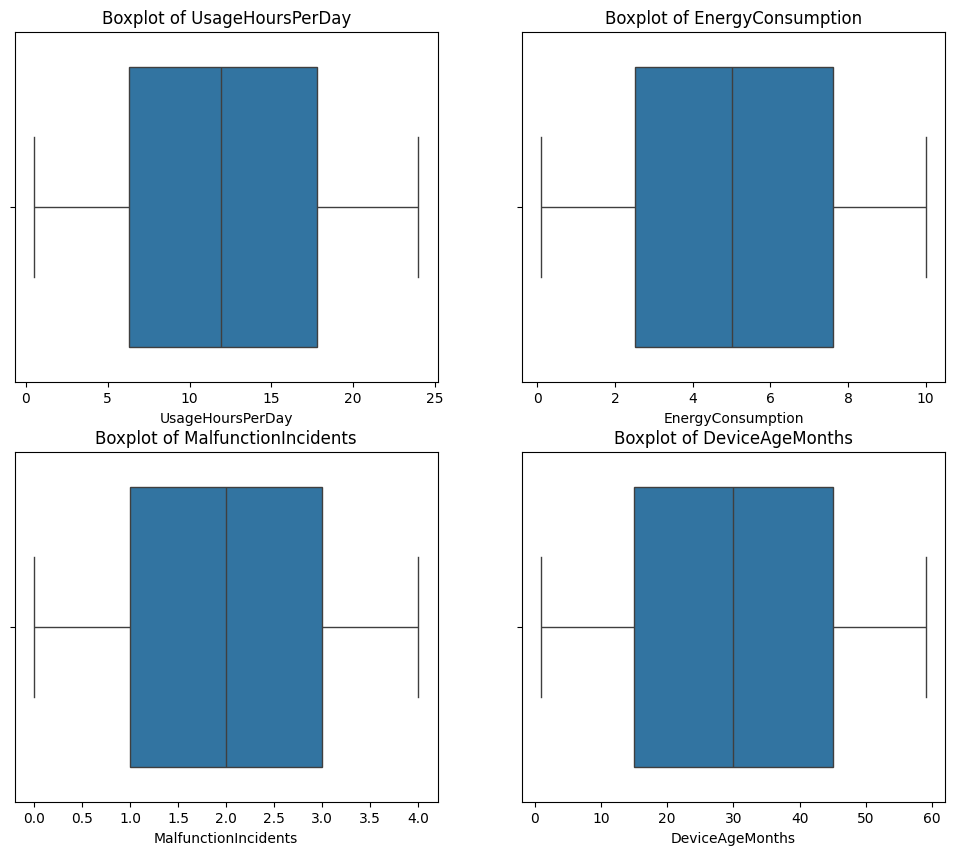

In [6]:
numerical_columns = [
    'UsageHoursPerDay',
    'EnergyConsumption',
    'MalfunctionIncidents',
    'DeviceAgeMonths'
]

categorical_columns = [
    'UserPreferences',
    'DeviceType',
    'SmartHomeEfficiency'
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.show()

Perform EDA with univariate analysis

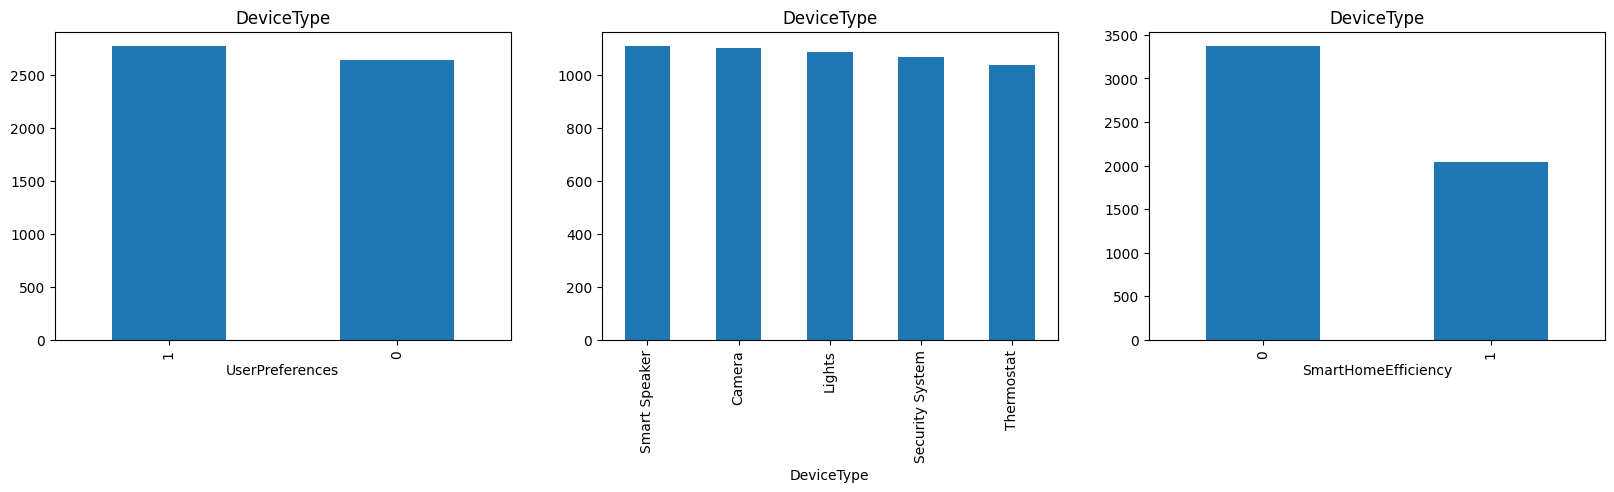

In [7]:
plt.figure(figsize=(20, 4))
for i, col in enumerate(categorical_columns):
	plt.subplot(1, 3, i+1)
	count = df[col].value_counts()
	count.plot(kind='bar', title='DeviceType');

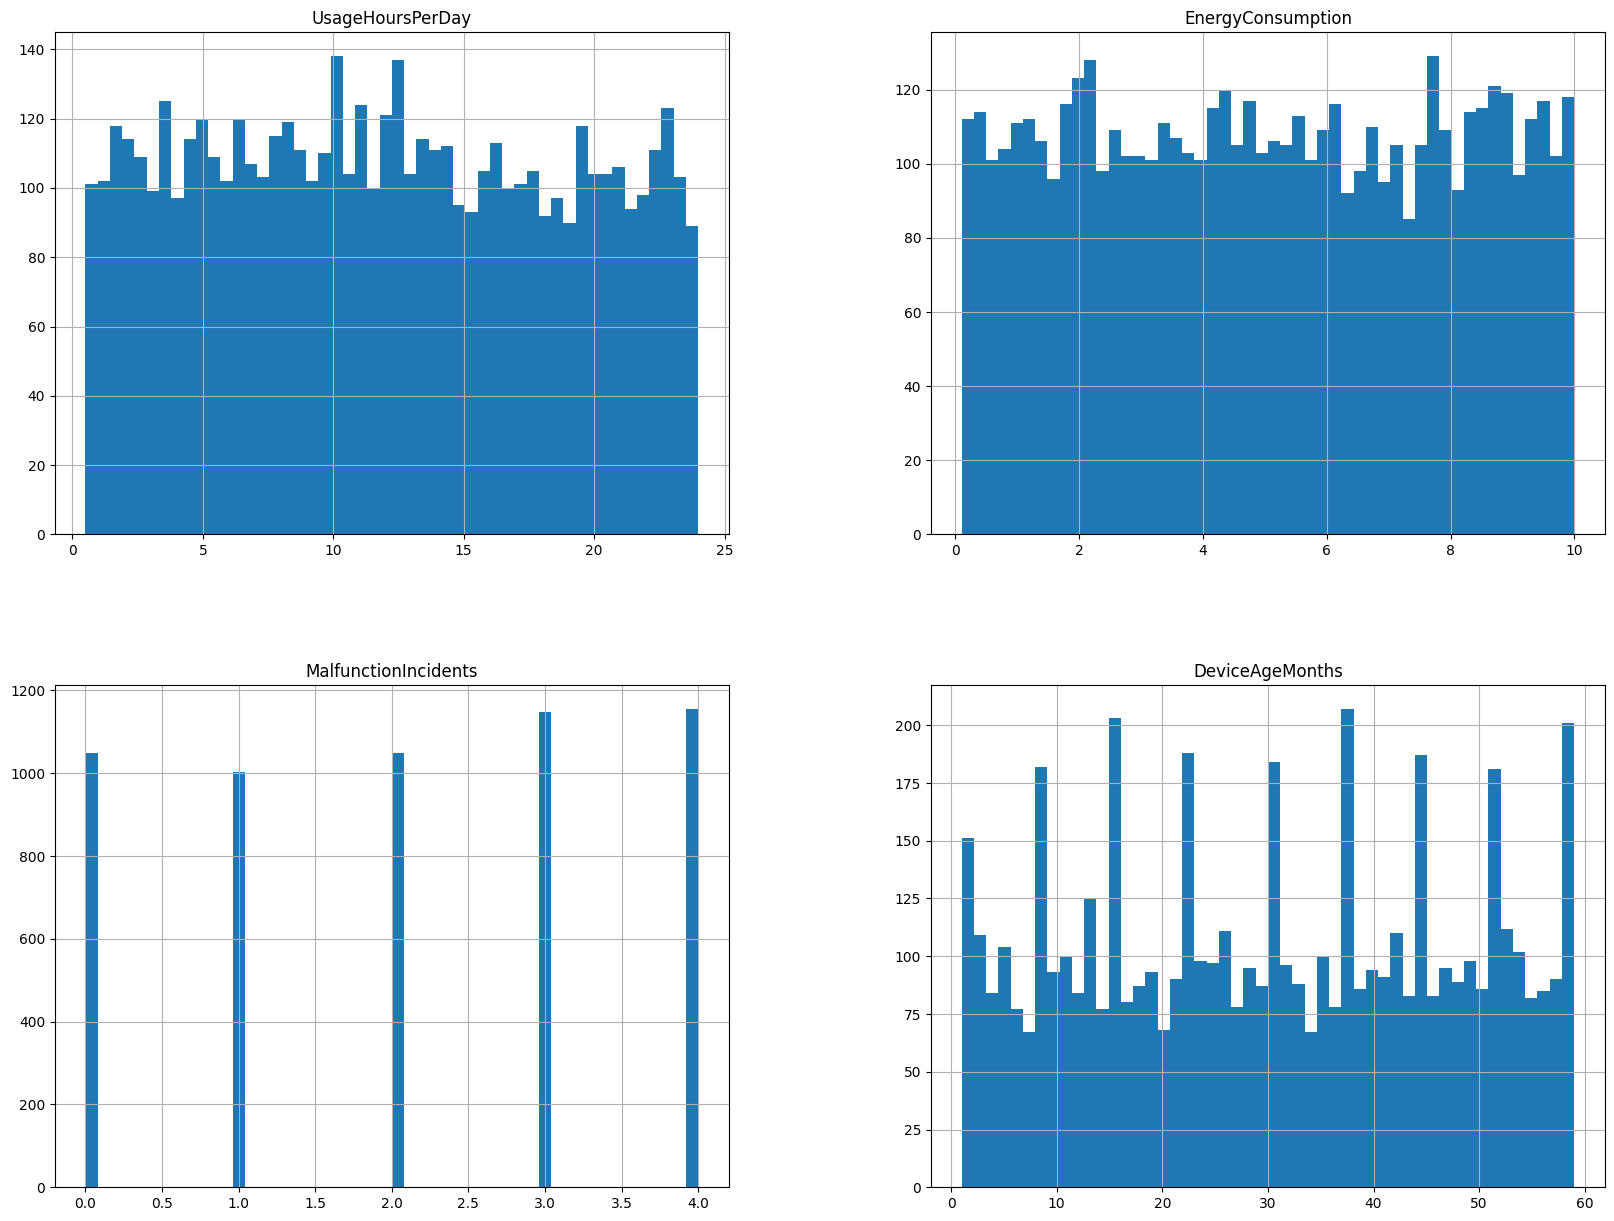

In [8]:
df[numerical_columns].hist(bins=50, figsize=(20,15))
plt.show()

Perform EDA with multivariate analysis

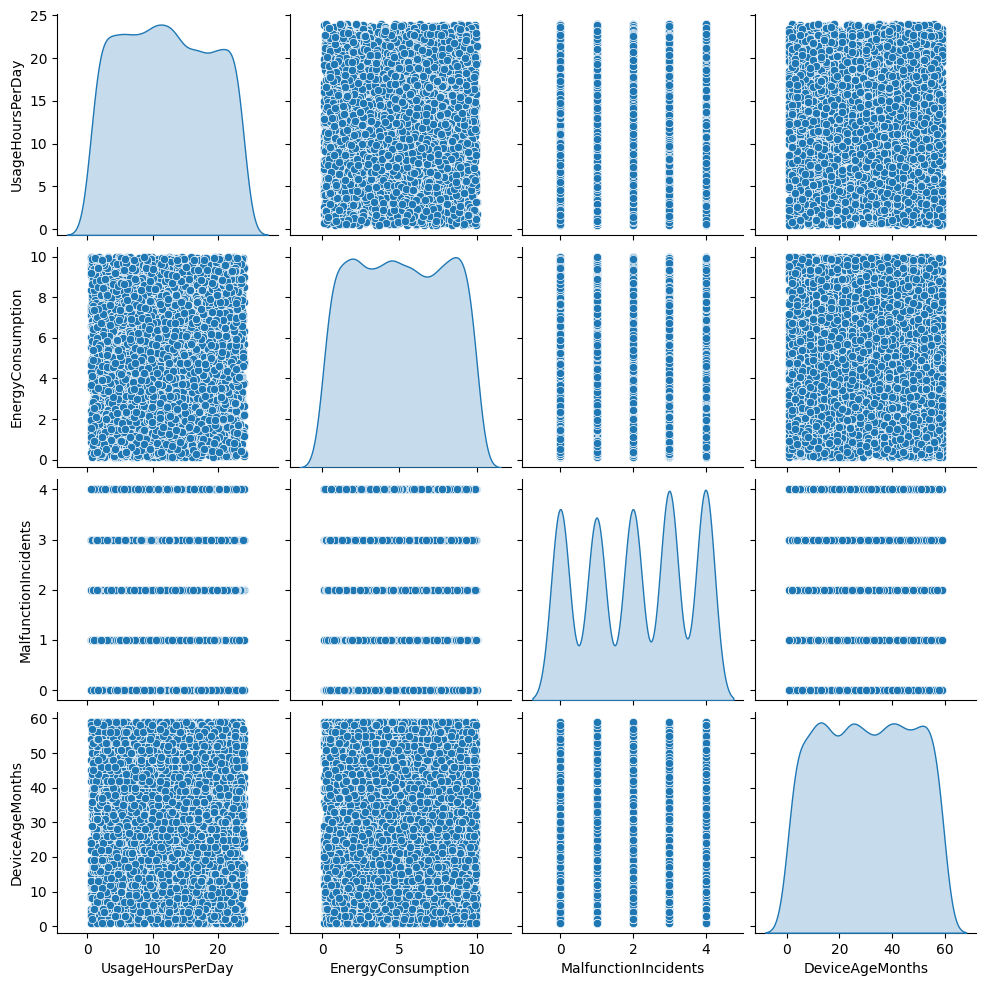

In [9]:
sns.pairplot(df[numerical_columns], diag_kind = 'kde')

<Axes: >

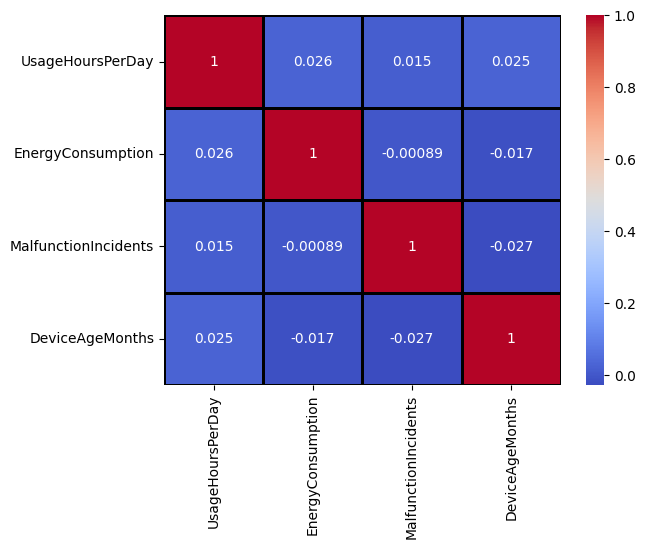

In [10]:
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linecolor='black', linewidths=1)

## Data Preparation

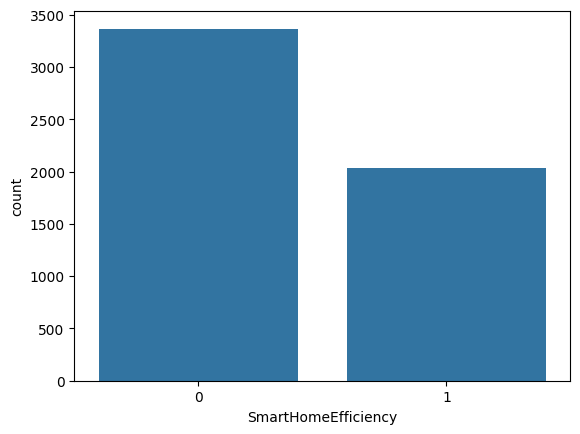

In [11]:
sns.countplot(data=df, x="SmartHomeEfficiency")
plt.show()

In [12]:
efficiency_1 = df[df['SmartHomeEfficiency'] == 1]
efficiency_0 = df[df['SmartHomeEfficiency'] == 0]

In [13]:
upsampled_efficiency_1 = resample(efficiency_1, n_samples=len(efficiency_0), random_state=42)

df = pd.concat([efficiency_0, upsampled_efficiency_1]).reset_index(drop=True)

In [14]:
df['SmartHomeEfficiency'].value_counts()

SmartHomeEfficiency
0    3368
1    3368
Name: count, dtype: int64

In [15]:
df = pd.concat([df, pd.get_dummies(df['DeviceType']).astype(int)], axis=1)
df = pd.concat([df, pd.get_dummies(df['UserPreferences'], prefix='preferences').astype(int)], axis=1)

df.drop(['DeviceType', 'UserPreferences'], axis=1, inplace=True)
df.head()

,UserID,UsageHoursPerDay,EnergyConsumption,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency,Camera,Lights,Security System,Smart Speaker,Thermostat,preferences_0,preferences_1
0,4,7.011127,2.341653,3,15,0,1,0,0,0,0,1,0
1,7,21.065640,2.229344,0,56,0,0,0,1,0,0,1,0
2,8,23.317096,2.791421,0,53,0,0,0,1,0,0,1,0
3,10,17.468553,7.212756,4,58,0,1,0,0,0,0,0,1
4,11,1.446710,7.723881,3,54,0,0,0,0,1,0,1,0


[0.838 0.969 0.994 1.   ]


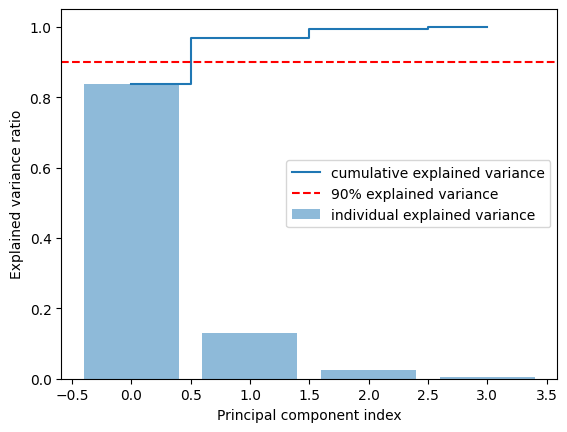

In [16]:
pca = PCA(n_components=len(numerical_columns), random_state=123)
pca.fit(df[numerical_columns])
princ_comp = pca.transform(df[numerical_columns])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

print(cum_var_exp)

plt.bar(range(len(numerical_columns)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(numerical_columns)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [17]:
pca = PCA(n_components=2, random_state=123)
pca.fit(df[numerical_columns])
princ_comp = pca.transform(df[numerical_columns])

df[['pca_1', 'pca_2']] = pd.DataFrame(princ_comp, columns=['pc_1', 'pc_2'])
df.drop(numerical_columns, axis=1, inplace=True)

df

,UserID,SmartHomeEfficiency,Camera,Lights,Security System,Smart Speaker,Thermostat,preferences_0,preferences_1,pca_1,pca_2
0,4,0,1,0,0,0,0,1,0,-14.651549,5.093828
1,7,0,0,0,1,0,0,1,0,26.620079,-8.153057
2,8,0,0,0,1,0,0,1,0,23.661589,-10.472127
3,10,0,1,0,0,0,0,0,1,28.517290,-4.637359
4,11,0,0,0,0,1,0,1,0,24.210487,11.296647
...,...,...,...,...,...,...,...,...,...,...,...
6731,2898,1,0,0,1,0,0,0,1,7.621528,-10.031904
6732,4594,1,1,0,0,0,0,0,1,2.392673,3.370579
6733,3166,1,0,0,0,0,1,0,1,1.604917,-8.587723
6734,1318,1,0,0,0,0,1,0,1,-8.760442,10.534474


In [18]:
X = df.drop(['SmartHomeEfficiency'], axis=1)
y = df['SmartHomeEfficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [19]:
print(f'Total sample in whole dataset: {len(X)}')
print(f'Total sample in train dataset: {len(X_train)}')
print(f'Total sample in test dataset: {len(X_test)}')

Total sample in whole dataset: 6736
Total sample in train dataset: 5388
Total sample in test dataset: 1348


In [20]:
numerical_features = ['pca_1', 'pca_2']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_train.head()

,UserID,Camera,Lights,Security System,Smart Speaker,Thermostat,preferences_0,preferences_1,pca_1,pca_2
165,264,0,1,0,0,0,1,0,-0.975402,-0.016034
6210,1178,0,1,0,0,0,0,1,-1.148484,-0.712793
2308,3614,1,0,0,0,0,1,0,-0.144583,-0.511032
1813,2844,0,1,0,0,0,1,0,-1.502210,-1.012364
6224,2459,0,1,0,0,0,0,1,-1.261975,-1.478498


## Modeling

In [21]:
title = ['Random Forest', 'Boosting', 'Bagging']

models = [
    (RandomForestClassifier, {
        'n_estimators': [50, 100, 200], 
        'max_depth': [None, 10, 20], 
        'min_samples_split': [2, 5], 
        'min_samples_leaf': [1, 2], 
        'criterion': ['gini', 'entropy'], 
        'bootstrap': [True, False]
    }),
    (GradientBoostingClassifier, {
        'learning_rate': [0.01, 0.1, 0.2], 
        'n_estimators': [50, 100, 150], 
        'max_depth': [3, 4, 5], 
        'subsample': [0.8, 0.9, 1.0], 
        'min_samples_split': [2, 5], 
        'min_samples_leaf': [1, 2],
        'max_features': [None, 'sqrt', 'log2']
    }),
    (BaggingClassifier, {
        'n_estimators': [10, 20, 30], 
        'max_samples': [0.5, 0.7, 1.0], 
        'max_features': [0.5, 0.7, 1.0], 
        'bootstrap': [True, False]
    })
]

accuracy = []
pred = []
result = []
time = []

for i in range(len(title)):
    
    model, param_grid = models[i]
    grid_search = GridSearchCV(estimator=model(random_state=123), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    t1 = datetime.datetime.now()
    best_model = model(**grid_search.best_params_, random_state=123)
    best_model.fit(X_train, y_train)
    t2 = datetime.datetime.now()
    
    y_pred = best_model.predict(X_test)
    
    delta = t2-t1
    delta_model = round(delta.total_seconds(), 3)
	
    accuracy.append(accuracy_score(y_test, y_pred))
    pred.append(classification_report(y_test, y_pred))
    result.append([y_test, y_pred])
    time.append(delta_model)

    print(f'{title[i]} Training Time: ', delta_model, 'Seconds')
    print(f'Accuracy {title[i]} = {accuracy_score(y_test, y_pred)}')
    print(f"{title[i]} - Best Params: {grid_search.best_params_}\n")

Random Forest Training Time:  0.314 Seconds
Accuracy Random Forest = 0.9028189910979229
Random Forest - Best Params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Boosting Training Time:  0.633 Seconds
Accuracy Boosting = 0.8931750741839762
Boosting - Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150, 'subsample': 1.0}

Bagging Training Time:  0.328 Seconds
Accuracy Bagging = 0.8968842729970327
Bagging - Best Params: {'bootstrap': False, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 20}



## Evaluation

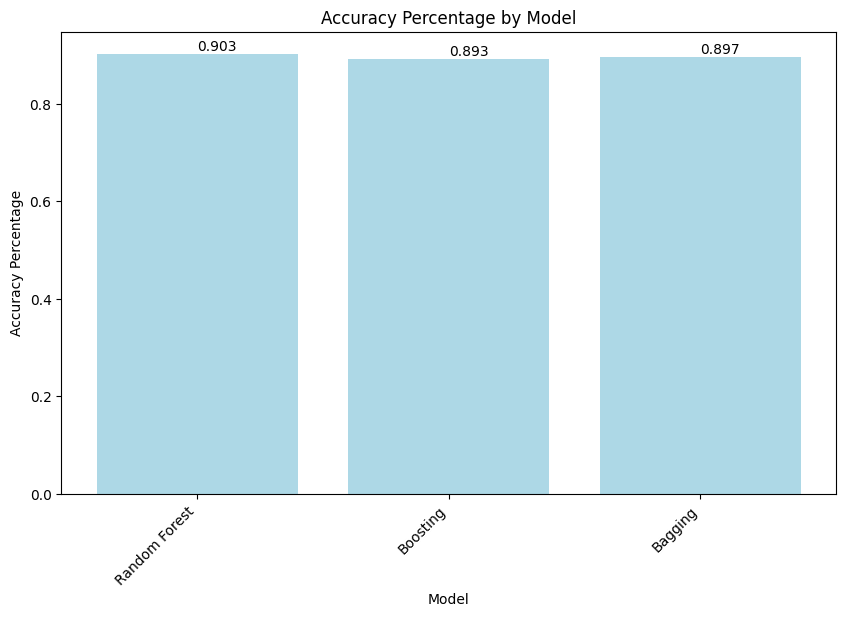

In [22]:
plt.figure(figsize=(10, 6))
bars = plt.bar(title, accuracy, color='#ADD8E6') 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom') 

plt.title('Accuracy Percentage by Model')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy Percentage')

plt.show()

Accuracy Random Forest: 0.9028189910979229

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       687
           1       0.89      0.92      0.90       661

    accuracy                           0.90      1348
   macro avg       0.90      0.90      0.90      1348
weighted avg       0.90      0.90      0.90      1348



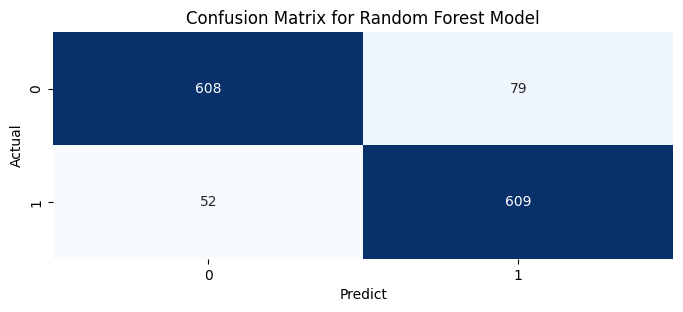

Accuracy Boosting: 0.8931750741839762

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       687
           1       0.86      0.93      0.90       661

    accuracy                           0.89      1348
   macro avg       0.90      0.89      0.89      1348
weighted avg       0.90      0.89      0.89      1348



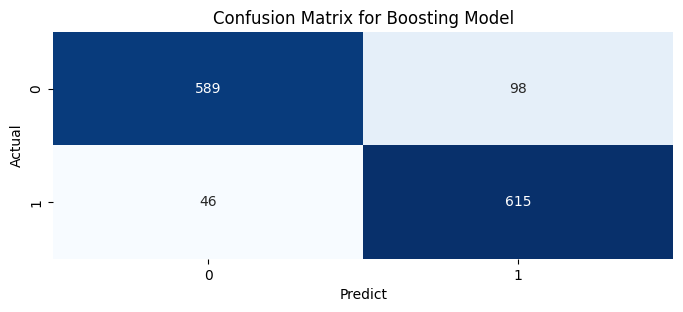

Accuracy Bagging: 0.8968842729970327

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       687
           1       0.89      0.90      0.90       661

    accuracy                           0.90      1348
   macro avg       0.90      0.90      0.90      1348
weighted avg       0.90      0.90      0.90      1348



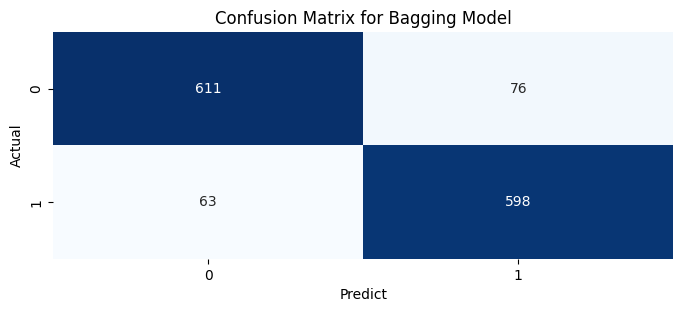

In [23]:
for i in range(len(title)):
    print(f'Accuracy {title[i]}: ' + str(accuracy[i]) + '\n')
    print(pred[i])
    
    y_test, y_pred = result[i]
    confussion = confusion_matrix(y_test, y_pred, labels=[0, 1])
    
    plt.figure(figsize=(8, 10))
    plt.subplot(3, 1, i+1)
    sns.heatmap(confussion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {title[i]} Model')
    plt.xlabel('Predict')
    plt.xticks(ticks=[i + 0.5 for i in range(2)], labels=[0, 1])
    plt.ylabel('Actual')
    plt.yticks(ticks=[i + 0.5 for i in range(2)], labels=[0, 1])
    plt.show()